In [ ]:
!pip install pandas numpy matplotlib
!pip install tabulate


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
print("Environment setup complete. Libraries installed and imported successfully!")


Environment setup complete. Libraries installed and imported successfully!


In [ ]:
links = pd.read_csv('/content/links.csv')
movies = pd.read_csv('/content/movies.csv')
ratings = pd.read_csv('/content/ratings.csv')
tags = pd.read_csv('/content/tags.csv')


In [ ]:
from tabulate import tabulate

print("Links Data:")
print(tabulate(links.head(), headers="keys", tablefmt="pretty"))

print("\nMovies Data:")
print(tabulate(movies.head(), headers="keys", tablefmt="pretty"))

print("\nRatings Data:")
print(tabulate(ratings.head(), headers="keys", tablefmt="pretty"))

print("\nTags Data:")
print(tabulate(tags.head(), headers="keys", tablefmt="pretty"))



Links Data:
+---+---------+----------+---------+
|   | movieId |  imdbId  | tmdbId  |
+---+---------+----------+---------+
| 0 |   1.0   | 114709.0 |  862.0  |
| 1 |   2.0   | 113497.0 | 8844.0  |
| 2 |   3.0   | 113228.0 | 15602.0 |
| 3 |   4.0   | 114885.0 | 31357.0 |
| 4 |   5.0   | 113041.0 | 11862.0 |
+---+---------+----------+---------+

Movies Data:
+---+---------+------------------------------------+---------------------------------------------+
|   | movieId |               title                |                   genres                    |
+---+---------+------------------------------------+---------------------------------------------+
| 0 |    1    |          Toy Story (1995)          | Adventure|Animation|Children|Comedy|Fantasy |
| 1 |    2    |           Jumanji (1995)           |         Adventure|Children|Fantasy          |
| 2 |    3    |      Grumpier Old Men (1995)       |               Comedy|Romance                |
| 3 |    4    |      Waiting to Exhale (1995)  

In [ ]:
from tabulate import tabulate

def display_info(df, df_name):
    info = {
        "Column Name": df.columns,
        "Non-Null Count": df.notnull().sum(),
        "Dtype": df.dtypes
    }
    print(f"\n{df_name} Info:")
    print(tabulate(info, headers="keys", tablefmt="pretty"))

# Display info for each dataset
display_info(links, "Links")
display_info(movies, "Movies")
display_info(ratings, "Ratings")
display_info(tags, "Tags")



Links Info:
+-------------+----------------+---------+
| Column Name | Non-Null Count |  Dtype  |
+-------------+----------------+---------+
|   movieId   |      9742      |  int64  |
|   imdbId    |      9742      |  int64  |
|   tmdbId    |      9734      | float64 |
+-------------+----------------+---------+

Movies Info:
+-------------+----------------+--------+
| Column Name | Non-Null Count | Dtype  |
+-------------+----------------+--------+
|   movieId   |      9742      | int64  |
|    title    |      9742      | object |
|   genres    |      9742      | object |
+-------------+----------------+--------+

Ratings Info:
+-------------+----------------+---------+
| Column Name | Non-Null Count |  Dtype  |
+-------------+----------------+---------+
|   userId    |     100836     |  int64  |
|   movieId   |     100836     |  int64  |
|   rating    |     100836     | float64 |
|  timestamp  |     100836     |  int64  |
+-------------+----------------+---------+

Tags Info:
+------

Identify Missing Values:

In [ ]:
# Display missing values in a tabulated format
def display_missing_values(df, df_name):
    missing_values = {
        "Column Name": df.columns,
        "Missing Values": df.isnull().sum(),
        "Percentage Missing": (df.isnull().sum() / len(df) * 100).round(2)
    }
    print(f"\nMissing Values in {df_name} Data:")
    print(tabulate(missing_values, headers="keys", tablefmt="pretty"))

# Display missing values for each dataset
display_missing_values(links, "Links")
display_missing_values(movies, "Movies")
display_missing_values(ratings, "Ratings")
display_missing_values(tags, "Tags")



Missing Values in Links Data:
+-------------+----------------+--------------------+
| Column Name | Missing Values | Percentage Missing |
+-------------+----------------+--------------------+
|   movieId   |       0        |        0.0         |
|   imdbId    |       0        |        0.0         |
|   tmdbId    |       8        |        0.08        |
+-------------+----------------+--------------------+

Missing Values in Movies Data:
+-------------+----------------+--------------------+
| Column Name | Missing Values | Percentage Missing |
+-------------+----------------+--------------------+
|   movieId   |       0        |        0.0         |
|    title    |       0        |        0.0         |
|   genres    |       0        |        0.0         |
+-------------+----------------+--------------------+

Missing Values in Ratings Data:
+-------------+----------------+--------------------+
| Column Name | Missing Values | Percentage Missing |
+-------------+----------------+--------

Handle Missing Values in links.csv

In [ ]:
links_cleaned = links.dropna(subset=['tmdbId'])
print(f"Rows before cleaning: {len(links)}")
print(f"Rows after cleaning: {len(links_cleaned)}")


Rows before cleaning: 9742
Rows after cleaning: 9734


Ensure Correct Data Types

In [ ]:
# Clean the links DataFrame by dropping rows with missing tmdbId and assign it to links_cleaned
links_cleaned = links.dropna(subset=['tmdbId'])

# Update data types
links_cleaned.loc[:, 'tmdbId'] = links_cleaned['tmdbId'].astype(int)
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
tags['timestamp'] = pd.to_datetime(tags['timestamp'], unit='s')

print("Data types updated successfully.")

# Function to display data types in a tabulated format
def display_data_types(df, df_name):
    data_types = {
        "Column Name": df.columns,
        "Data Type": df.dtypes
    }
    print(f"\n{df_name} Data Types:")
    print(tabulate(data_types, headers="keys", tablefmt="pretty"))

# Display data types for each DataFrame
display_data_types(links_cleaned, "Links Cleaned")
display_data_types(ratings, "Ratings")
display_data_types(tags, "Tags")


Data types updated successfully.

Links Cleaned Data Types:
+-------------+-----------+
| Column Name | Data Type |
+-------------+-----------+
|   movieId   |   int64   |
|   imdbId    |   int64   |
|   tmdbId    |  float64  |
+-------------+-----------+

Ratings Data Types:
+-------------+----------------+
| Column Name |   Data Type    |
+-------------+----------------+
|   userId    |     int64      |
|   movieId   |     int64      |
|   rating    |    float64     |
|  timestamp  | datetime64[ns] |
+-------------+----------------+

Tags Data Types:
+-------------+----------------+
| Column Name |   Data Type    |
+-------------+----------------+
|   userId    |     int64      |
|   movieId   |     int64      |
|     tag     |     object     |
|  timestamp  | datetime64[ns] |
+-------------+----------------+


Merge DataFrames

In [ ]:
# Merge the links_cleaned and movies DataFrames
merged_links_movies = pd.merge(links_cleaned, movies, on='movieId', how='inner')

# Display the merged DataFrame in a tabulated format
print("Merged Links and Movies Data:")
print(tabulate(merged_links_movies.head(), headers="keys", tablefmt="pretty"))



Merged Links and Movies Data:
+---+---------+--------+---------+------------------------------------+---------------------------------------------+
|   | movieId | imdbId | tmdbId  |               title                |                   genres                    |
+---+---------+--------+---------+------------------------------------+---------------------------------------------+
| 0 |    1    | 114709 |  862.0  |          Toy Story (1995)          | Adventure|Animation|Children|Comedy|Fantasy |
| 1 |    2    | 113497 | 8844.0  |           Jumanji (1995)           |         Adventure|Children|Fantasy          |
| 2 |    3    | 113228 | 15602.0 |      Grumpier Old Men (1995)       |               Comedy|Romance                |
| 3 |    4    | 114885 | 31357.0 |      Waiting to Exhale (1995)      |            Comedy|Drama|Romance             |
| 4 |    5    | 113041 | 11862.0 | Father of the Bride Part II (1995) |                   Comedy                    |
+---+---------+--------+--

Extract the Year from the Title

In [ ]:
# Extract the year from the title column
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)')

# Display the updated DataFrame in a tabulated format
print("Movies Data with Year Extracted:")
print(tabulate(movies[['title', 'year']].head(), headers="keys", tablefmt="pretty"))



Movies Data with Year Extracted:
+---+------------------------------------+------+
|   |               title                | year |
+---+------------------------------------+------+
| 0 |          Toy Story (1995)          | 1995 |
| 1 |           Jumanji (1995)           | 1995 |
| 2 |      Grumpier Old Men (1995)       | 1995 |
| 3 |      Waiting to Exhale (1995)      | 1995 |
| 4 | Father of the Bride Part II (1995) | 1995 |
+---+------------------------------------+------+


Filter Ratings

In [ ]:
# Filter ratings with a value of 4.0 or higher
high_ratings = ratings[ratings['rating'] >= 4.0]

# Display the filtered DataFrame in a tabulated format
print("High Ratings Data:")
print(tabulate(high_ratings.head(), headers="keys", tablefmt="pretty"))

# Print the number of high ratings
print(f"\nNumber of high ratings: {len(high_ratings)}")



High Ratings Data:
+---+--------+---------+--------+---------------------+
|   | userId | movieId | rating |      timestamp      |
+---+--------+---------+--------+---------------------+
| 0 |   1    |    1    |  4.0   | 2000-07-30 18:45:03 |
| 1 |   1    |    3    |  4.0   | 2000-07-30 18:20:47 |
| 2 |   1    |    6    |  4.0   | 2000-07-30 18:37:04 |
| 3 |   1    |   47    |  5.0   | 2000-07-30 19:03:35 |
| 4 |   1    |   50    |  5.0   | 2000-07-30 18:48:51 |
+---+--------+---------+--------+---------------------+

Number of high ratings: 48580


Join Ratings with Movie Titles

In [ ]:
# Merge high ratings with movie titles
high_ratings_with_titles = pd.merge(high_ratings, movies[['movieId', 'title']], on='movieId', how='inner')

# Display the merged DataFrame in a tabulated format
print("High Ratings with Movie Titles:")
print(tabulate(high_ratings_with_titles.head(), headers="keys", tablefmt="pretty"))



High Ratings with Movie Titles:
+---+--------+---------+--------+---------------------+-----------------------------+
|   | userId | movieId | rating |      timestamp      |            title            |
+---+--------+---------+--------+---------------------+-----------------------------+
| 0 |   1    |    1    |  4.0   | 2000-07-30 18:45:03 |      Toy Story (1995)       |
| 1 |   1    |    3    |  4.0   | 2000-07-30 18:20:47 |   Grumpier Old Men (1995)   |
| 2 |   1    |    6    |  4.0   | 2000-07-30 18:37:04 |         Heat (1995)         |
| 3 |   1    |   47    |  5.0   | 2000-07-30 19:03:35 | Seven (a.k.a. Se7en) (1995) |
| 4 |   1    |   50    |  5.0   | 2000-07-30 18:48:51 | Usual Suspects, The (1995)  |
+---+--------+---------+--------+---------------------+-----------------------------+


Visualize Ratings Distribution

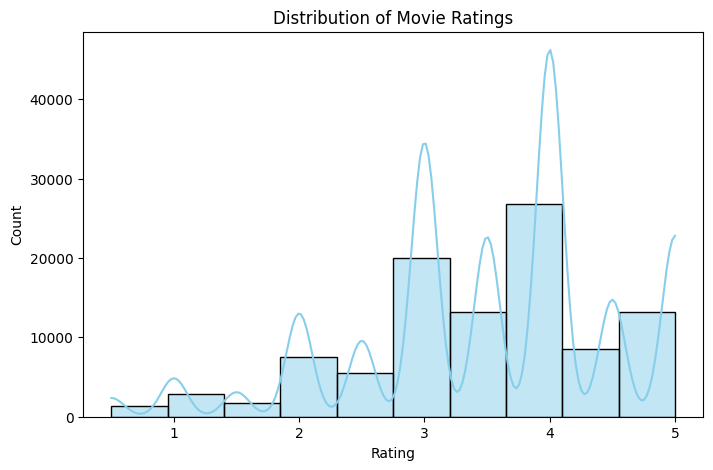

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot ratings distribution
plt.figure(figsize=(8, 5))
sns.histplot(ratings['rating'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


Find and visualize the top 10 movies with the highest average ratings (only movies with at least 50 ratings to ensure statistical significance)

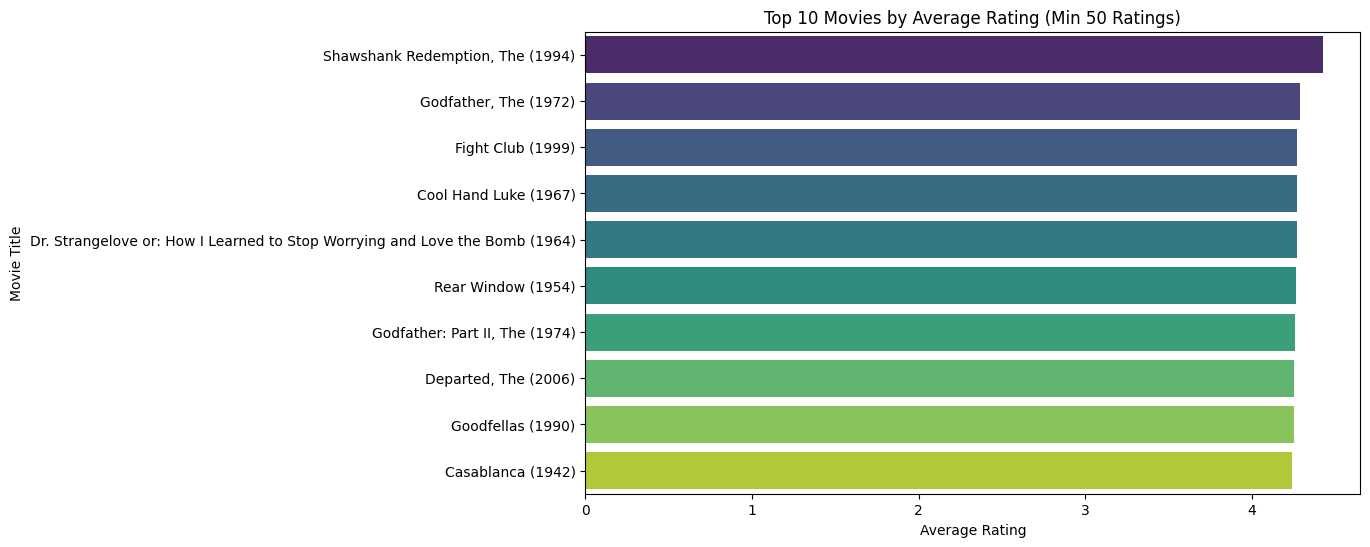

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_movies_with_titles,
    y='title',
    x='average_rating',
    hue='title',
    dodge=False,  # Prevents split bars for each hue
    palette='viridis',
    legend=False  # Disables unnecessary legend
)
plt.title('Top 10 Movies by Average Rating (Min 50 Ratings)')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.show()



Find the top 10 most commonly used tags and visualize their frequency

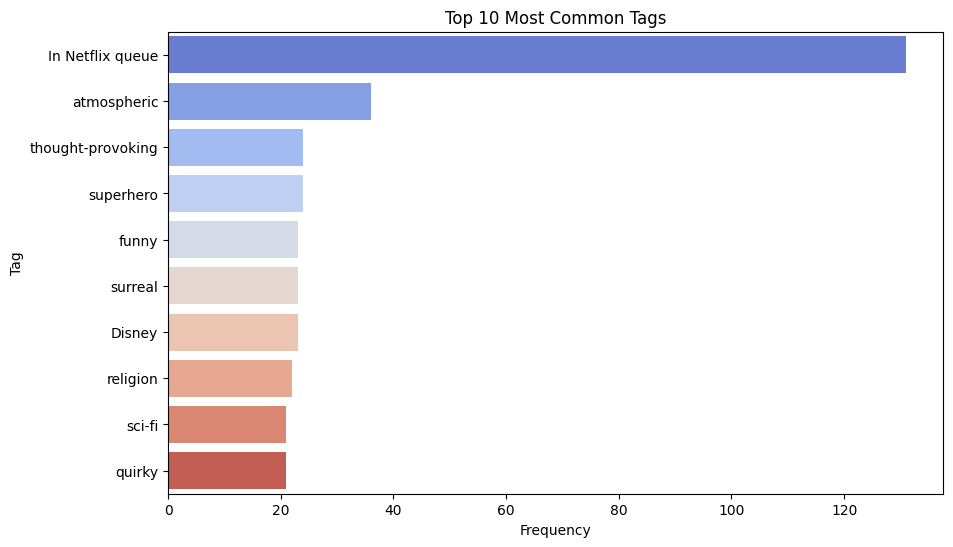

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=tag_counts.values,
    y=tag_counts.index,
    hue=tag_counts.index,
    dodge=False,
    palette='coolwarm',
    legend=False
)
plt.title('Top 10 Most Common Tags')
plt.xlabel('Frequency')
plt.ylabel('Tag')
plt.show()



Save the Cleaned and Transformed Data

In [ ]:
# Save merged links and movies data
merged_links_movies.to_csv('/content/merged_links_movies.csv', index=False)
print("Merged Links and Movies data saved to merged_links_movies.csv")

# Save movies with year extracted
movies.to_csv('/content/movies_with_year.csv', index=False)
print("Movies with year saved to movies_with_year.csv")

# Save high ratings with titles
high_ratings_with_titles.to_csv('/content/high_ratings_with_titles.csv', index=False)
print("High Ratings with Titles data saved to high_ratings_with_titles.csv")


Merged Links and Movies data saved to merged_links_movies.csv
Movies with year saved to movies_with_year.csv
High Ratings with Titles data saved to high_ratings_with_titles.csv


In [ ]:
import os

# Verify saved files
for file in ['/content/merged_links_movies.csv', '/content/movies_with_year.csv', '/content/high_ratings_with_titles.csv']:
    print(f"{file} exists: {os.path.exists(file)}")


/content/merged_links_movies.csv exists: True
/content/movies_with_year.csv exists: True
/content/high_ratings_with_titles.csv exists: True
